## Import Libraries

In [1]:
# Importing the libraries, fill the import name libraries below
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler

#Import keras libraries that you need
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

# EDA

In [2]:
# Some functions to help out with this code
def prediction_plot(test,predicted):
    plt.plot(test, color='red',label='Real NKE Stock Price')
    plt.plot(predicted, color='blue',label='Predicted NKE Stock Price')
    plt.title('NKE Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('NKE Stock Price')
    plt.legend()
    plt.show()
    #fill the function to predict

def rmse_eval(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    #fill the function for evaluation model

In [3]:
# Import Dataset
dataset = pd.read_csv('C:/Users/USER/Project Data Science/Case Study 04/NKE_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date']) #import dataset based on your directory
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.85,10.92,10.67,10.74,18468800,NKE
2006-01-04,10.71,10.80,10.67,10.69,15832000,NKE
2006-01-05,10.69,10.83,10.69,10.76,9256000,NKE
2006-01-06,10.79,10.83,10.71,10.72,7573600,NKE
2006-01-09,10.72,10.98,10.72,10.88,10441600,NKE


In [4]:
# Checking for missing values, choose for data training and set in kind of year
#a : until year training 
#b : year for testing
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

### Write your insight in EDA here
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.

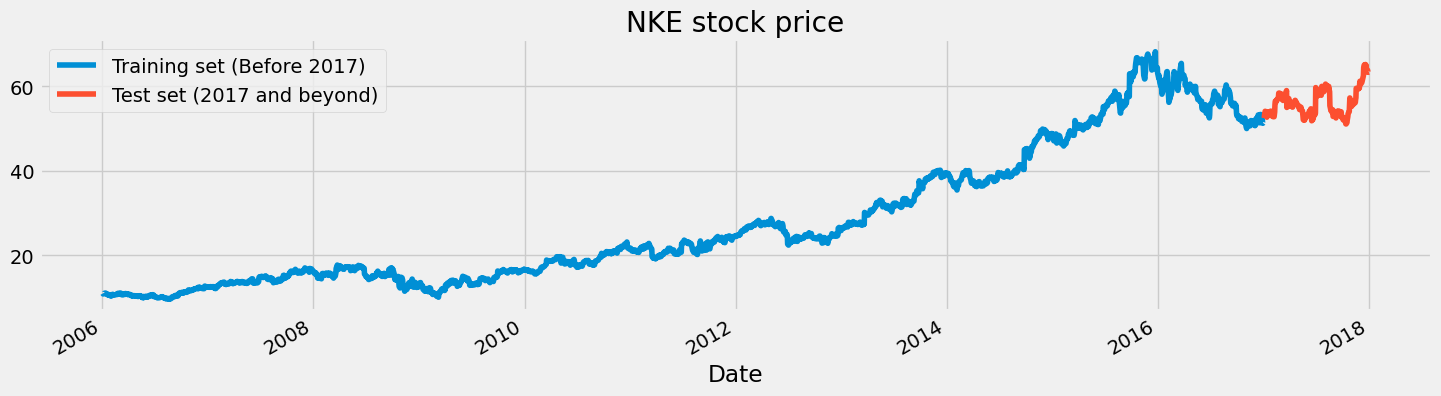

In [5]:
#Checking for stock's market company with line plot
#Write your code below
dataset['High'][:'2016'].plot(figsize=(16,4),legend=True)
dataset['High']['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('NKE stock price')
plt.show()

In [6]:
# Scaling with minmaxscaller for data train
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
#checking shape of data train
training_set_scaled.shape

(2769, 1)

In [8]:
# create data structure to fill how many row for input in your model at data train
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    #fill for x_train and y_train here
#change it into the array
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
# Reshaping X_train before modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## Modelling

In [10]:
# Sequential Modelling
model_lstm = Sequential()
# First LSTM layer with Dropout regularisation
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model_lstm.add(Dropout(0.2))
# Second LSTM layer
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
# Third LSTM layer, fill the code below
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
# Fourth LSTM layer, fill the code below
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
# The output layer
model_lstm.add(Dense(units=1))
# Compiling
model_lstm.compile(optimizer='rmsprop',loss='mean_squared_error')
# Train fitting for the model
model_lstm.fit(X_train,y_train,epochs=50,batch_size=32)

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 62s 349ms/step - loss: 0.0226
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 33s 391ms/step - loss: 0.0064
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 40s 375ms/step - loss: 0.0038
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 33s 375ms/step - loss: 0.0039
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 40s 363ms/step - loss: 0.0034
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 38s 317ms/step - loss: 0.0032
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 40s 303ms/step - loss: 0.0026
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 40s 287ms/step - loss: 0.0020
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 46s 347ms/step - loss: 0.0025
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 40s 338ms/step - loss: 0.0020
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 38s 302ms/step - loss: 0.0025
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 40s 295ms/step - loss: 0.0022
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 42s 308ms/step - loss: 0.0021
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 43s 331ms/step - loss: 0.0019
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 40s 

In [11]:
# Prepare for data test similar way for data train
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
test = dataset_total['2017':]
#Transform the inputs
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [12]:
#checking data test shape
inputs.shape

(311, 1)

### Prediction

In [13]:
# Preparing X_test and predicting the prices of the stock's that you choose
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#Predicting stocks price
predict_stock_price = model_lstm.predict(X_test)
predicted_stock_price = sc.inverse_transform(predict_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 874ms/step


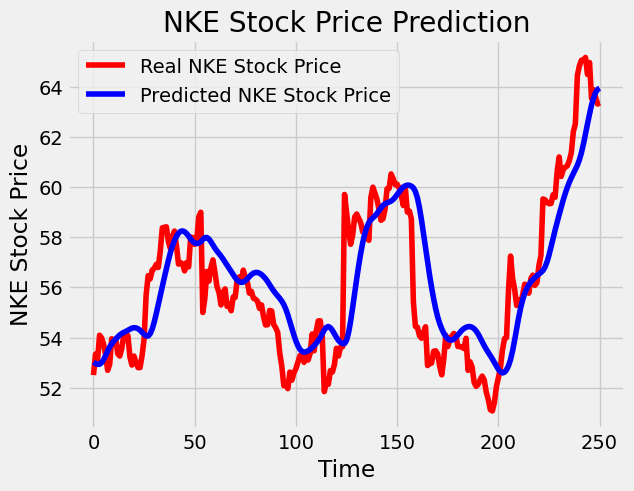

In [14]:
plt.plot(test_set, color='red',label='Real NKE Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted NKE Stock Price')
plt.title('NKE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NKE Stock Price')
plt.legend()
plt.show()

In [15]:
# Evaluating our model with RMSE function above
rmse_eval(test_set,predicted_stock_price)

The root mean squared error is 1.7567402498006564.


### Write your Insight and advice here :)


RMSE sebesar 1.7567 menunjukkan bahwa prediksi model relatif dekat dengan harga saham sebenarnya, menandakan akurasi yang cukup baik.
Secara keseluruhan, RMSE menunjukkan bahwa model LSTM mampu memberikan prediksi harga saham NKE yang relatif akurat, namun kita juga bisa
menggunakan GRU sebagai pembanding untuk mencari hasil yang lebih baik.